In [136]:
# SUSANA'S CONTRIBUTION PART 1: Q6 to Q10
# =======================================
# Import necessary modules
import numpy as np
import pandas as pd
import re

# read the csv file into Dataframe: df, and check data is read ok
df = pd.read_csv('data_assignment.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head(3)  


The Dataset consists of:  149999  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


In [137]:
# Choose job sector, how many sub-sectors are there in that sector? 
# I tried using Unique function, but couldn't make it work:  np.unique(sector, trim='fb')[source]

# Chose the Accounting Sector, create new dataset
sub_classification = df[df['Classification'] == "Accounting" ].groupby(['Classification','SubClassification'])
sub_classification['Classification'].value_counts()
print('There are',len(sub_classification), 'sub sectors within Accounting')

There are 25 sub sectors within Accounting


In [138]:
# List the names of each sub-sector and it's job posting total
print('Sub Sectors and total job posting numbers:')
df[df['Classification'] == "Accounting" ]['SubClassification'].value_counts()

Sub Sectors and total job posting numbers:


Financial Accounting & Reporting           919
Business Services & Corporate Advisory     805
Accounts Officers/Clerks                   711
Financial Managers & Controllers           674
Payroll                                    530
Accounts Receivable/Credit Control         461
Taxation                                   411
Management Accounting & Budgeting          410
Accounts Payable                           398
Analysis & Reporting                       389
Assistant Accountants                      337
Bookkeeping & Small Practice Accounting    255
Audit - External                           126
Audit - Internal                           121
Other                                      106
Management                                 100
Strategy & Planning                         59
Compliance & Risk                           58
Systems Accounting & IT Audit               49
Treasury                                    44
Insolvency & Corporate Recovery             37
Cost Accounti

In [139]:
# List the salary ranges and their total of job postings
# read and set salary ranges from numbers to strings
df['SalaryRange'] = df['LowestSalary'].astype(str) + ' - ' + df['HighestSalary'].astype(str)
df.SalaryRange.value_counts()


0 - 30       27606
40 - 50      17708
60 - 70      14108
100 - 120    13062
70 - 80      12932
80 - 100     12582
50 - 60      12559
30 - 40      12441
150 - 200    11738
120 - 150    10651
200 - 250     4612
Name: SalaryRange, dtype: int64

In [140]:
#Q1.8 List the job types, in each job type, what are the lowest and highest salary?
df_jobtype1 = df.groupby('JobType').agg({'LowestSalary':'min', 'HighestSalary':'max'})[['LowestSalary','HighestSalary']].reset_index()
print(df_jobtype1.head())


           JobType  LowestSalary  HighestSalary
0  Casual/Vacation             0            250
1    Contract/Temp             0            250
2        Full Time             0            250
3        Part Time             0            250


In [141]:
# Q2.1 The salaries are set as HighestSalary and LowestSalary, calc AverageSalary for each job.
from math import *

# calculate average salary
df["AverageSalary"] = (df["LowestSalary"]+df["HighestSalary"])/2

print(df[['Title', 'AverageSalary']])

                                                    Title  AverageSalary
0                                Casual Stock Replenisher           15.0
1                                Casual Stock Replenisher           15.0
2       RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...           15.0
3                                   Team member - Belrose           15.0
4       Business Banking Contact Centre Specialist, Ni...           15.0
...                                                   ...            ...
149994                           Dance Studio Coordinator           15.0
149995                                 Geology Technician           15.0
149996                         Lead Product Manager UX/UI           15.0
149997                             Junior Primary Teacher           15.0
149998                                  Network Engineer            15.0

[149999 rows x 2 columns]


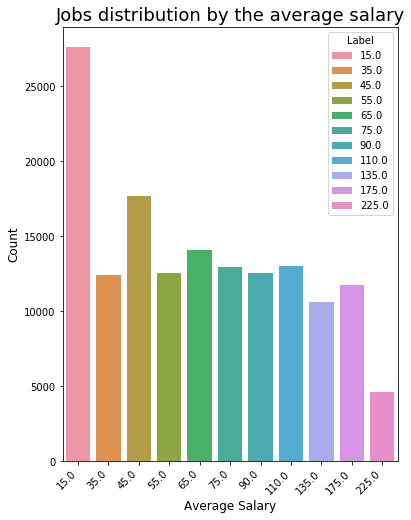

In [142]:
# Part 2 - Data Analysis and Interpretation
# Get the salary ranges using "AverageSalary", the total jobs of each range and display them in the bar chart.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read and preprocess data set
df = pd.read_csv('data_assignment.csv')

#Calculate average salary 
df["AverageSalary"] = (df["LowestSalary"]+df["HighestSalary"])/2

# Group and aggregate
df = df.groupby('AverageSalary').count()
df['Label'] = df.index
df['Count'] = df["Id"]

# Set size and plot figure
plt.figure(figsize=(6,8))
df = df.sort_values(by=['Count'], ascending = False)
barChart = sns.barplot(x='Label', y='Count',hue='Label', data=df, dodge=False)

# formatting bar chart
barChart.set_xticklabels(
        barChart.get_xticklabels(),
        rotation=45,
        horizontalalignment='right',
        fontweight='light',
        fontsize='medium'
)

# Set the titles and labels
plt.title('Jobs distribution by the average salary', {'fontsize': '18'})
plt.ylabel('Count', size=12)
plt.xlabel('Average Salary', size=12)
plt.show()


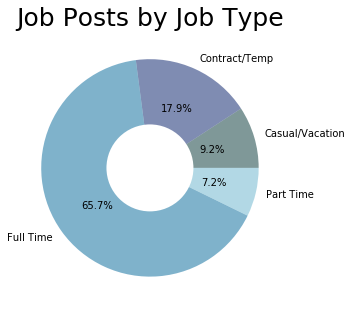

In [178]:
# Display the list of job types and the number of jobs of each type using pie chart.

#create dataframe for salary ranges
df_jobtype = df[df['JobType'].isna()==False]
df_jobtype = df_jobtype.groupby(['JobType']).count()
df_jobtype['Label'] = df_jobtype.index
df_jobtype['Count'] = df_jobtype["Id"]

# plot and format pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(df_jobtype['Count'], colors=sns.color_palette("ocean", len(df_jobtype)),labels=df_jobtype['Label'],wedgeprops={'alpha':0.5},autopct='%.1f%%')
ax.set_title('Job Posts by Job Type', size=25, loc='center')

# add centre circle to make donut chart
centre_circle = plt.Circle((0,0),0.4, fc='white')
ax.add_patch(centre_circle)

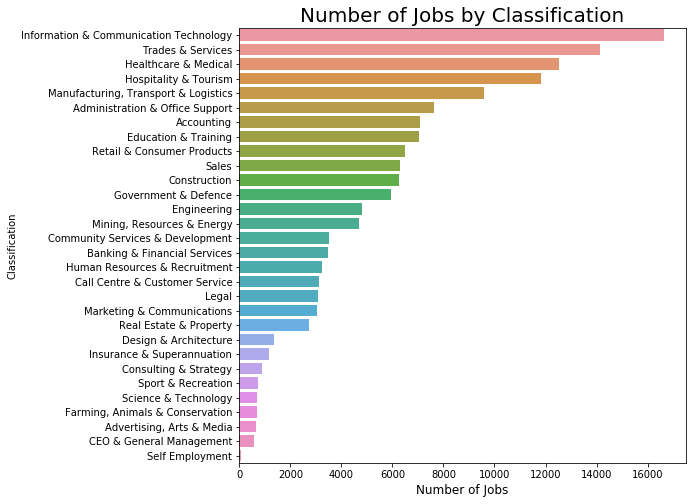

In [177]:
# Display the list of job sectors and the number of jobs of each type using horizontal bar chart
# Set figure
plt.figure(figsize=(8,8))

# Plot bar chart
sns.countplot(y='Classification',data=df,order=df.Classification.value_counts().index)

# Set title and labels
plt.title('Number of Jobs by Classification', size=20)
plt.xlabel('Number of Jobs', size=12)
plt.show()

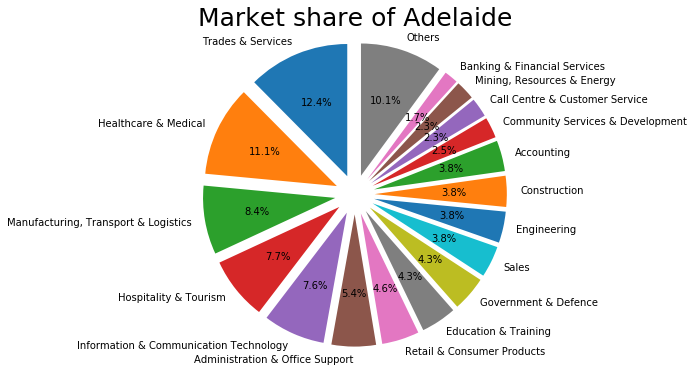

In [171]:
# Choose location, visualise the market share of that location in pie chart.
# Set pie chart size
fig1, ax1 = plt.subplots(figsize=(6,6))

# format white gaps between pie pieces
explode = [0.15] *18

# Select location: Adelaide
locationDf = df[(df['Location'].isna()==False) & (df['Location'] == "Adelaide")]
locationDf = locationDf.groupby('Classification').count()
locationDf['Classification'] = locationDf.index
locationDf['Count'] = locationDf["Id"]

# Pie char for job market share of cities
from matplotlib import cm
locationDf = locationDf.sort_values(by=["Count"], ascending =False)

# Get the top 17 locations
locationTop18Df = locationDf[:17].copy()

# others 
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [locationDf["Count"][17:].sum()]
})

# Add 17 top locations with others
locationTop18Df = pd.concat([locationTop18Df, new_row],sort=False)
locationTop18Df.index = locationTop18Df['Classification']

# Pie chart
plt.pie( locationTop18Df["Count"], labels=locationTop18Df['Classification'], autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Market share of Adelaide', size=25, loc='center')
plt.show()

Text(3.6750000000000043, 0.5, 'Highest Salary')

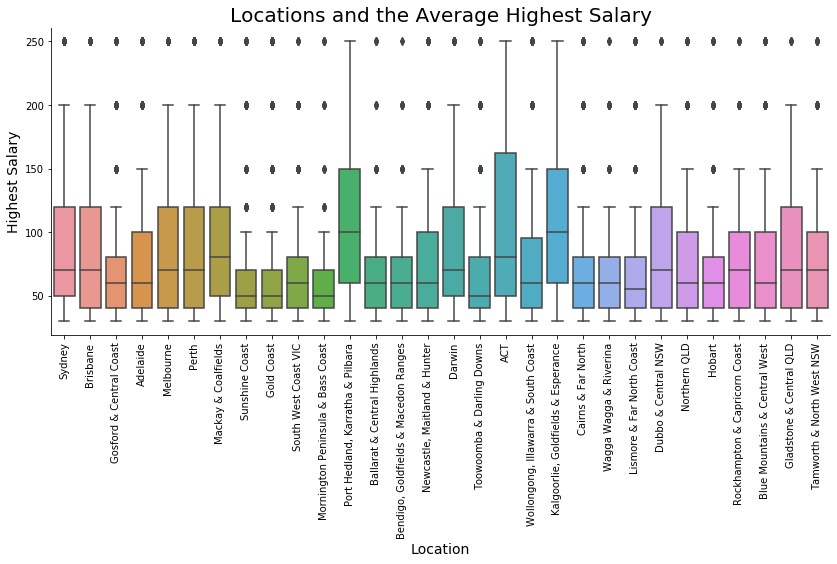

In [175]:
# Salary Distribution of top 30 cities for number of job postings, visualise with boxplot.
# Sort dataset by location removing NA locations
locationDf2 = df[df['Location'].isna()==False]

# Group locations and get totals to calculate salary distribution
locationDf2 = locationDf2.groupby('Location').count()
locationDf2['Location'] = locationDf2.index
locationDf2['Count'] = locationDf2["Id"]

# Sort by location totals in descending value
locationDf2 = locationDf2.sort_values(by=["Count"], ascending =False)

# Select top 30 locations only
locationTop30Df = locationDf2[:30].copy()

df_top30 = df[(df['Location'].isna()==False) & (df['Location'].isin(locationTop30Df['Location']).astype(int))]
# Format boxplot
ax = sns.catplot(x="Location", y="HighestSalary", data = df_top30, kind="box", height=5, aspect=2.5)
# Setup labels and titles
ax.set_xticklabels(rotation=90)
plt.title('Locations and the Average Highest Salary',size=20,loc='center')
plt.xlabel('Location',size=14)
plt.ylabel('Highest Salary',size=14)